In [9]:
'''
Read the data.
Maybe plot some graphs
'''

'\nRead the data.\nMaybe plot some graphs\n'

In [23]:
import pandas as pd


In [86]:
dataset = pd.read_csv('SourceData/Stocks/ge.us.txt', index_col="Date", parse_dates=True)

In [25]:
dataset.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14058.000000,14058.000000,14058.000000,14058.000000,1.405800e+04,14058.0
mean,10.534737,10.642538,10.421090,10.534161,2.423066e+07,0.0
std,11.742897,11.868891,11.612159,11.743726,3.369859e+07,0.0
min,0.459020,0.466900,0.451140,0.459020,0.000000e+00,0.0
25%,0.901500,0.909600,0.893800,0.901500,5.496950e+06,0.0
50%,3.880900,3.912700,3.824300,3.884800,1.597520e+07,0.0
75%,21.416000,21.658000,21.149250,21.370000,2.853667e+07,0.0
max,47.751000,48.459000,47.596000,48.056000,9.345354e+08,0.0


In [37]:
dataset.head(10)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579.0,0
1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749.0,0
1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010.0,0
1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244.0,0
1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430.0,0
1962-01-09,0.5957,0.6037,0.5878,0.5957,2778285.0,0
1962-01-10,0.5957,0.6037,0.5957,0.5957,2337096.0,0
1962-01-11,0.5957,0.5957,0.5878,0.5957,1943605.0,0
1962-01-12,0.5957,0.6037,0.5878,0.5878,2015151.0,0


In [26]:
import matplotlib.pyplot as plt

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14058 entries, 1962-01-02 to 2017-11-10
Data columns (total 6 columns):
Open       14058 non-null float64
High       14058 non-null float64
Low        14058 non-null float64
Close      14058 non-null float64
Volume     14058 non-null float64
OpenInt    14058 non-null int64
dtypes: float64(5), int64(1)
memory usage: 768.8 KB


In [87]:
'''
Volume and OpenInt need their types to be changed
'''
dataset["Volume"] = dataset["Volume"].astype(float)
dataset = dataset.drop(columns="OpenInt")
dataset = dataset[7000:]

In [89]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [91]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])


In [94]:
import numpy as np

In [95]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [101]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

(6998, 60, 1)

In [105]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [106]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

W0826 20:14:29.510572  7196 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 20:14:29.613512  7196 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 20:14:29.640499  7196 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0826 20:14:30.945750  7196 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0826 20:14:30.988728  7196 deprecation.py:506

In [107]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0826 20:18:09.646323  7196 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 20:18:11.196444  7196 deprecation.py:323] From C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0826 20:18:23.682304  7196 deprecation_wrapper.py:119] From C:\Users\admin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
6998/6998 [==============================] - 48s 7ms/step - loss: 0.0082
Epoch 2/100
6998/6998 [==============================] - 34s 5ms/step - loss: 0.0022
Epoch 3/100
6998/6998 [==============================] - 35s 5ms/step - loss: 0.0020
Epoch 4/100
6998/6998 [==============================] - 35s 5ms/step - loss: 0.0017
Epoch 5/100
6998/6998 [==============================] - 37s 5ms/step - loss: 0.0017
Epoch 6/100
6998/6998 [==============================] - 34s 5ms/step - loss: 0.0014
Epoch 7/100
6998/6998 [==============================] - 35s 5ms/step - loss: 0.0013
Epoch 8/100
6998/6998 [==============================] - 36s 5ms/step - loss: 0.0013
Epoch 9/100
6998/6998 [==============================] - 50s 7ms/step - loss: 0.0011
Epoch 10/100
6998/6998 [==============================] - 42s 6ms/step - loss: 0.0012
Epoch 11/100
6998/6998 [==============================] - 38s 5ms/step - loss: 0.0010
Epoch 12/100
6998/6998 [==============================] - 36s 5

6998/6998 [==============================] - 35s 5ms/step - loss: 4.9485e-04
Epoch 93/100
6998/6998 [==============================] - 35s 5ms/step - loss: 5.2215e-04
Epoch 94/100
6998/6998 [==============================] - 35s 5ms/step - loss: 5.4711e-04
Epoch 95/100
6998/6998 [==============================] - 36s 5ms/step - loss: 4.8779e-04
Epoch 96/100
6998/6998 [==============================] - 36s 5ms/step - loss: 5.1308e-04
Epoch 97/100
6998/6998 [==============================] - 39s 6ms/step - loss: 4.9786e-04
Epoch 98/100
6998/6998 [==============================] - 39s 6ms/step - loss: 4.9807e-04
Epoch 99/100
6998/6998 [==============================] - 36s 5ms/step - loss: 4.9839e-04
Epoch 100/100
6998/6998 [==============================] - 36s 5ms/step - loss: 5.0675e-04: 1s - loss: 5.


In [112]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('SourceData/Stocks/ge.us.test.csv',index_col="Date",parse_dates=True)



In [117]:
real_stock_price = dataset_test.iloc[:, 0:1].values

In [131]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [132]:

test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 448 entries, 2017-11-13 to 2019-08-26
Data columns (total 1 columns):
Open    448 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB


In [137]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, test_set.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [138]:


predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 1 columns):
0    388 non-null float32
dtypes: float32(1)
memory usage: 1.6 KB


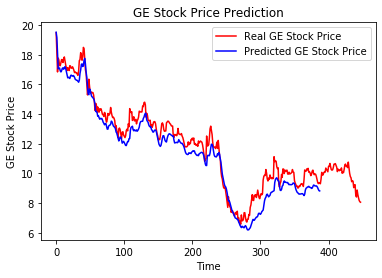

In [139]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real GE Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted GE Stock Price')
plt.title('GE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GE Stock Price')
plt.legend()
plt.show()